In [1]:
import re, string,os
from glob import glob as gb
import pandas as pd
from tqdm import tqdm
from collections import Counter
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from functions import *

plotting.style_('tab20',16)
base_path = "/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase"

In [2]:
# """
# Notebook for investigating "rally around the flag" effect. Looking at:
# - words / session / party
# """

In [14]:
def plot_words_session_party(language):
    data = data_loader.full(language,"lemmatized")
    data['date'] = [utils.find_date(x) for x in data['id']]
    data = utils.add_metadata(data,language)
    data = data[data['date'].str.contains('2019|2020')]
    d = []
    for date in set(data['date']):
        t = data[data['date'] == date]
        l = len(t)

        for p in set(t['speaker_party']):
            lp = len(t[t['speaker_party'] == p])
            d.append([date,p,lp,lp / l * 100])
    d = pd.DataFrame(d,columns=["date","party","n","nn"])
    t = d[['date','party','nn']].pivot(index='date',columns='party',values='nn').reset_index().fillna(0)
    fig, ax = plt.subplots(facecolor='white',figsize=(30, 5))
    labels = list(t.columns[1:])
    plt.stackplot(list(t.date), *[t[col] for col in labels])
    ax.set_facecolor("white")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    lgd = ax.legend(labels,bbox_to_anchor=(1, 1), loc='upper left')

    for ticks in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines():
        ticks.set_color("white")
    for pos in ['top', 'bottom', 'right', 'left']:
        ax.spines[pos].set_edgecolor("white")

    ax.tick_params(axis='x', pad=0)
    ax.xaxis.set_tick_params(rotation=90)
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % 7 != 0:
            label.set_visible(False)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(f"Share of Party Speeches in Words ({language.upper()})", fontsize=18)
    fig.savefig(f'{base_path}/results/plots/party_speeches_norm-{language}.png',dpi=350, bbox_inches='tight')

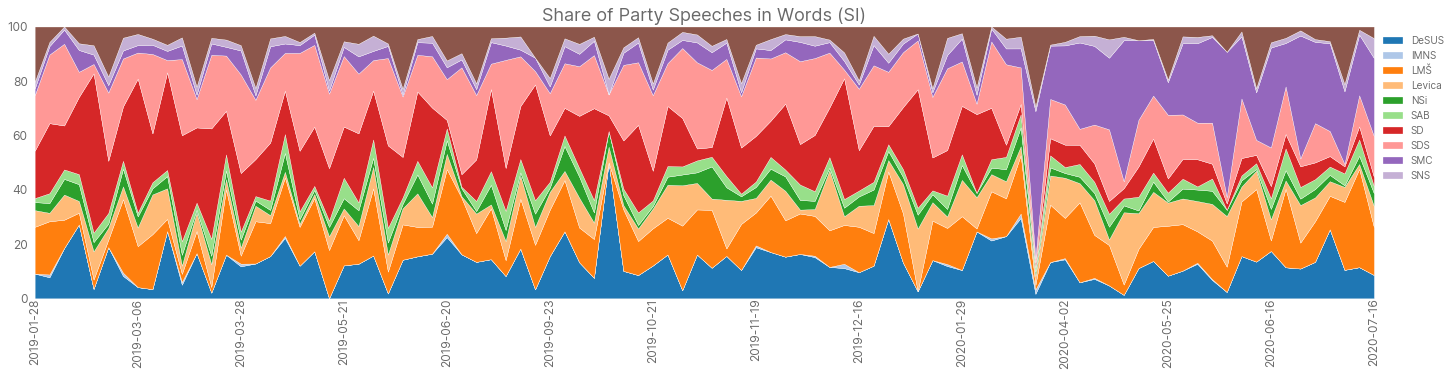

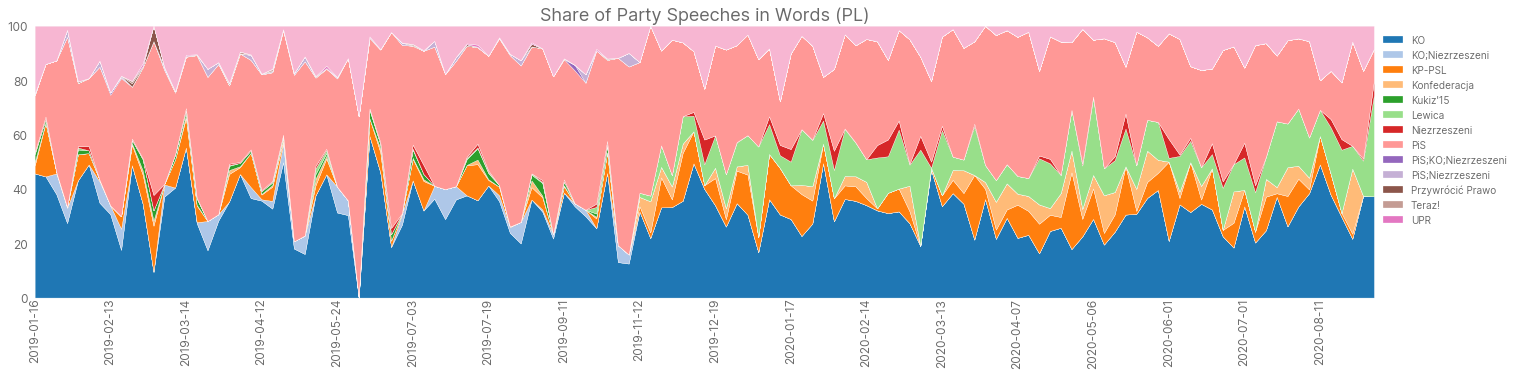

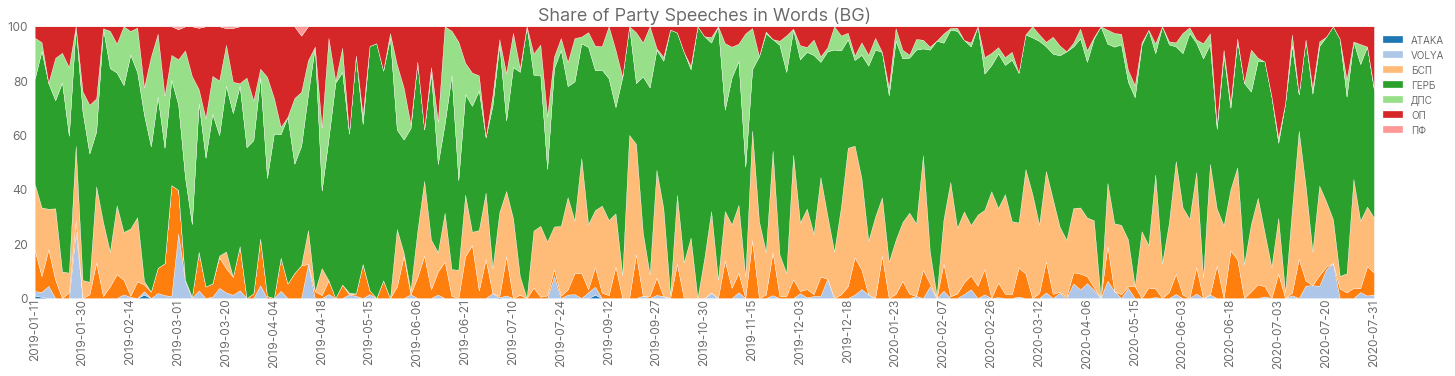

In [15]:
for i in ['si','pl','bg']:
    plot_words_session_party(i)